# 3.10 Guia - Regressão Linear

#### Importando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importando os Dados

In [4]:
base_dados = pd.read_excel('BaseDados_RegressaoLinear.xlsx','Plan1')
base_dados

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [5]:
base_dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [8]:
base_dados.tail()

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [7]:
base_dados.sample(5)

,Salario,Limite_Emprestimo
91,3091.940686,7172.352570
21,1540.759979,3574.089842
81,2799.093568,6493.037216
47,1995.679093,4629.362438
4,1300.983040,3017.881000


In [9]:
base_dados.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [10]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [11]:
base_dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


#### Conveter para um Array

In [12]:
# Aumenta a performance
eixo_x = base_dados.iloc[:,0].values
eixo_y = base_dados.iloc[:,1].values

In [23]:
# configurar a visualização
#%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#configurando parâmetros das fontes
plt.rcParams['font.family'] = 'sans-serif'

#### EDA

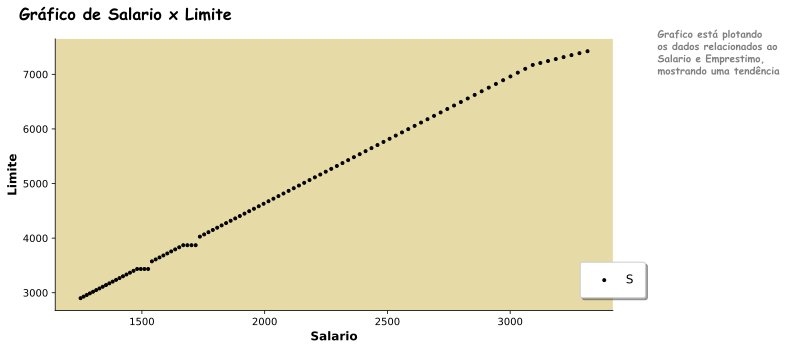

In [39]:
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#E6DAA6') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

plt.scatter(eixo_x,eixo_y, # Dados
            color='black', # Cor da linha
            marker='.', # Tipo de Marcador
           );

# Definindo label do eixo X
plt.xlabel(
        'Salario', # Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Limite',# Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 1000,
        y = 8000, # Coordenada para o Titulo
        s = 'Gráfico de Salario x Limite', # Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
)


plt.text(
        x = 3600,
        y = 7000, # Coordenada para o Titulo
        s = 'Grafico está plotando \n'
        'os dados relacionados ao \n'
        'Salario e Emprestimo,\n'
        'mostrando uma tendência', # Texto
        fontsize=10, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='grey', # Cor do Texto
        weight='bold' #
)

# Definindo as Legendas
plt.legend(
        'SxL', # Nome da Legenda
        loc='upper center', # Posição da Legenda
        bbox_to_anchor=(1,0.,0.0,0.2), # Posição da legenda
        fontsize='large', # Tamanho do Texto
        shadow=True, # Sombra na Legenda
        borderpad=1 # Tamanho da borda
        );

#### Verificando se Temos dados Nulos

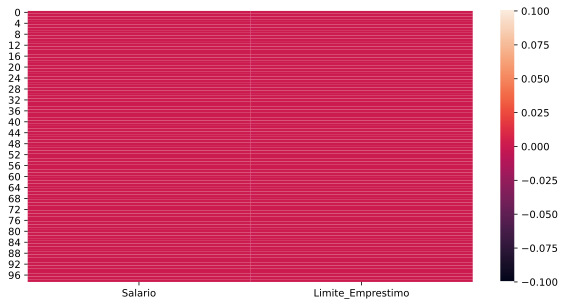

In [44]:
plt.figure(figsize=(10,5)) # Ajustando a cor


sns.heatmap(base_dados.isnull() # Dados
           );

<Figure size 1440x360 with 0 Axes>

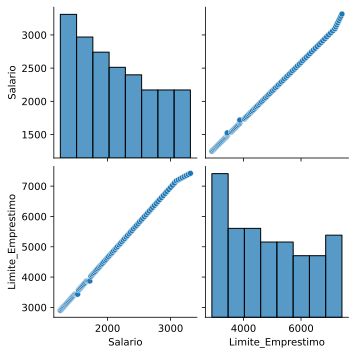

In [47]:
# Explorar todos os dados
sns.pairplot(base_dados);

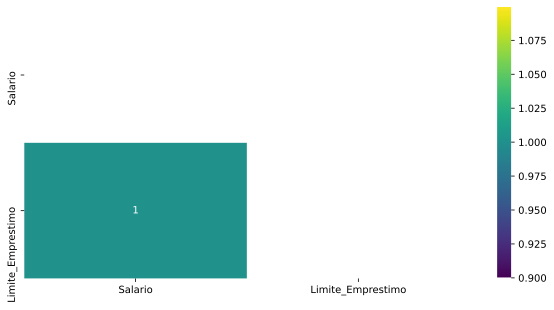

In [50]:
# Verificando correlação
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(base_dados.corr(), dtype=np.bool))
sns.heatmap(base_dados.corr(), linewidths=.1,cmap='viridis',annot=True,mask=mask);

In [51]:
eixo_x = eixo_x.reshape(-1,1)
eixo_y = eixo_y.reshape(-1,1)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(
                                                    eixo_x,
                                                    eixo_y,
                                                    test_size=0.2,
                                                    random_state=42
)

In [59]:
print(len(x_train), len(x_test))

79 20


In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
funcao_regressao = LinearRegression()

In [62]:
funcao_regressao.fit(x_train,y_train)

LinearRegression()

In [63]:
funcao_regressao.score(x_train,y_train)

0.9990915475310658

In [64]:
y_pred = funcao_regressao.predict(x_test)

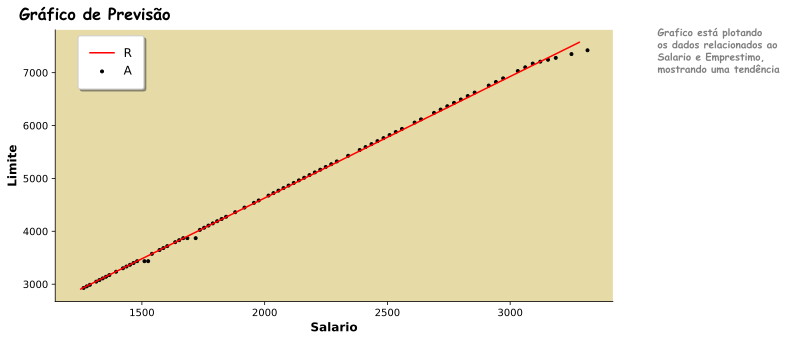

In [78]:
# Plotando o Grafico
plt.figure(figsize=(10,5),
           facecolor='white') # Ajustando a cor

ax = plt.axes()
ax.set_facecolor('#E6DAA6') #Cor de fundo do gráfico
ax.spines['right'].set_visible(False) # Remover grids e eixos
ax.spines['top'].set_visible(False) # Remover grids e eixos

plt.scatter(x_train,y_train, # Dados
            color='black', # Cor da linha
            marker='.', # Tipo de Marcador
           );
plt.plot(x_test,y_pred, # Dados
            color='red', # Cor da linha
           );

# Definindo label do eixo X
plt.xlabel(
        'Salario', # Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo label do eixo Y
plt.ylabel(
        'Limite',# Nome do Label
        fontweight='bold', # Estilo
        fontsize='large', # Tamanho da Fonte
        color = 'Black' # Cor da Fonte
)

# Definindo um Titulo
plt.text(
        x = 1000,
        y = 8000, # Coordenada para o Titulo
        s = 'Gráfico de Previsão',# Definindo o Texto
        fontsize=16, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='Black', # Cor do Texto
        weight='bold' #
)

plt.text(
        x = 3600,
        y = 7000, # Coordenada para o Titulo
        s = 'Grafico está plotando \n'
        'os dados relacionados ao \n'
        'Salario e Emprestimo,\n'
        'mostrando uma tendência', # Texto
        fontsize=10, # Tamanho do Texto
        fontfamily='fantasy', # Tipo da Fonte
        color='grey', # Cor do Texto
        weight='bold' #
)

# Definindo as Legendas
plt.legend(
        'RA',# Nome da Legenda
        loc='upper center', # Posição da Legenda
        bbox_to_anchor=(0.1,0.8,0.0,0.2), # Posição da legenda
        fontsize='large', # Tamanho do Texto
        shadow=True, # Sombra na Legenda
        borderpad=1 # Tamanho da borda
        );

In [70]:
from sklearn import metrics

In [71]:
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

RSME: 54.168287085041115


In [81]:
# Testando o modelo
print(funcao_regressao.predict([[5600]]))
print(funcao_regressao.predict([[2000]]))

[[12903.02677994]]
[[4629.46546332]]
